In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [5]:
data=pd.read_excel("/Users/thebeyonder/Downloads/NVD.xlsx",sheet_name="Sheet3")

In [20]:
x=np.array(data[['n_o',"s_o","a_o","m_o","t_o"]])

In [21]:
n_c=np.array(data['n_c'])

In [35]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(16,activation="relu"),
    tf.keras.layers.Dense(8,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(2,activation="relu"),
    tf.keras.layers.Dense(1)

])

In [36]:
model.compile(loss="mse",optimizer='adam',metrics=["accuracy"])

In [37]:
model.fit(x,n_c,batch_size=32,epochs=200)

Epoch 1/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 515us/step - accuracy: 0.0000e+00 - loss: 46252.7109
Epoch 2/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.0000e+00 - loss: 46397.7578
Epoch 3/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.0000e+00 - loss: 45568.7227
Epoch 4/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.0000e+00 - loss: 18421.9316
Epoch 5/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.0000e+00 - loss: 309.5043
Epoch 6/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.0000e+00 - loss: 90.5196
Epoch 7/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.0000e+00 - loss: 50.7759
Epoch 8/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.0000e+00 - loss: 37.9924
Epoch 9/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.0000e+00 - loss: 34.4589
Epoch 10/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.0000e+00 - loss: 38.1100
Epoch 11/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 

In [38]:
pred=model.predict(x)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step


In [39]:
acc=0
err=0
for i in range(1,len(pred)):
    if (pred[i]-pred[i-1])>=0 and (n_c[i]-n_c[i-1])>=0:
        acc+=1
    elif (pred[i]-pred[i-1])<0 and (n_c[i]-n_c[i-1])<0:
        acc+=1
    else:
        err+=1

In [40]:
print(acc)
print(err)

1450
1070


In [41]:
pred[:10]

array([[4.5620894],
       [4.6600385],
       [4.610529 ],
       [4.648643 ],
       [4.647848 ],
       [4.6240945],
       [4.7254667],
       [4.7099156],
       [4.6785016],
       [4.6560445]], dtype=float32)

In [42]:
n_c[:10]

array([4.66, 4.56, 4.57, 4.63, 4.51, 4.64, 4.57, 4.53, 4.5 , 4.49])

In [96]:
def model1():
    inputs=tf.keras.layers.Input(shape=(None,5))
    x=tf.keras.layers.LSTM(32,return_sequences=True)(inputs)
    x=tf.keras.layers.LSTM(16,return_sequences=True)(x)
    x=tf.keras.layers.Dense(4)(x)
    y=tf.keras.layers.Dense(1)(x)
    model=tf.keras.Model(inputs=inputs,outputs=y)
    return model


In [97]:
model2=model1()

In [98]:
model2.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, None, 5)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, None, 32)       │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_20 (LSTM)                  │ (None, None, 16)       │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, None, 4)        │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, None, 1)        │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,073 (31.54 KB)

 Trainable params: 8,073 (31.54 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
model2.compile(loss="mse",optimizer='adam')

In [89]:
model2.fit(x[:,np.newaxis,:],n_c,epochs=200)

Epoch 1/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 607us/step - loss: 45657.0703 
Epoch 2/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - loss: 39080.1367
Epoch 3/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - loss: 41588.2891
Epoch 4/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - loss: 37619.6719
Epoch 5/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - loss: 35705.6914
Epoch 6/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - loss: 32530.9160
Epoch 7/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 30908.6406
Epoch 8/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - loss: 28994.3047
Epoch 9/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - loss: 31234.2598
Epoch 10/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - loss: 26996.3145
Epoch 11/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 29134.8008
Epoch 12/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - loss: 26947.9375
Epoch 13/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - loss: 29458.3809
Epoch 14/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - loss:

In [90]:
pred=model2.predict(x[:,np.newaxis,:])


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [91]:
acc=0
err=0
for i in range(1,len(pred)):
    if (pred[i]-pred[i-1])>=0 and (n_c[i]-n_c[i-1])>=0:
        acc+=1
    elif (pred[i]-pred[i-1])<0 and (n_c[i]-n_c[i-1])<0:
        acc+=1
    else:
        err+=1

In [92]:
acc

1298

In [93]:
err

1222

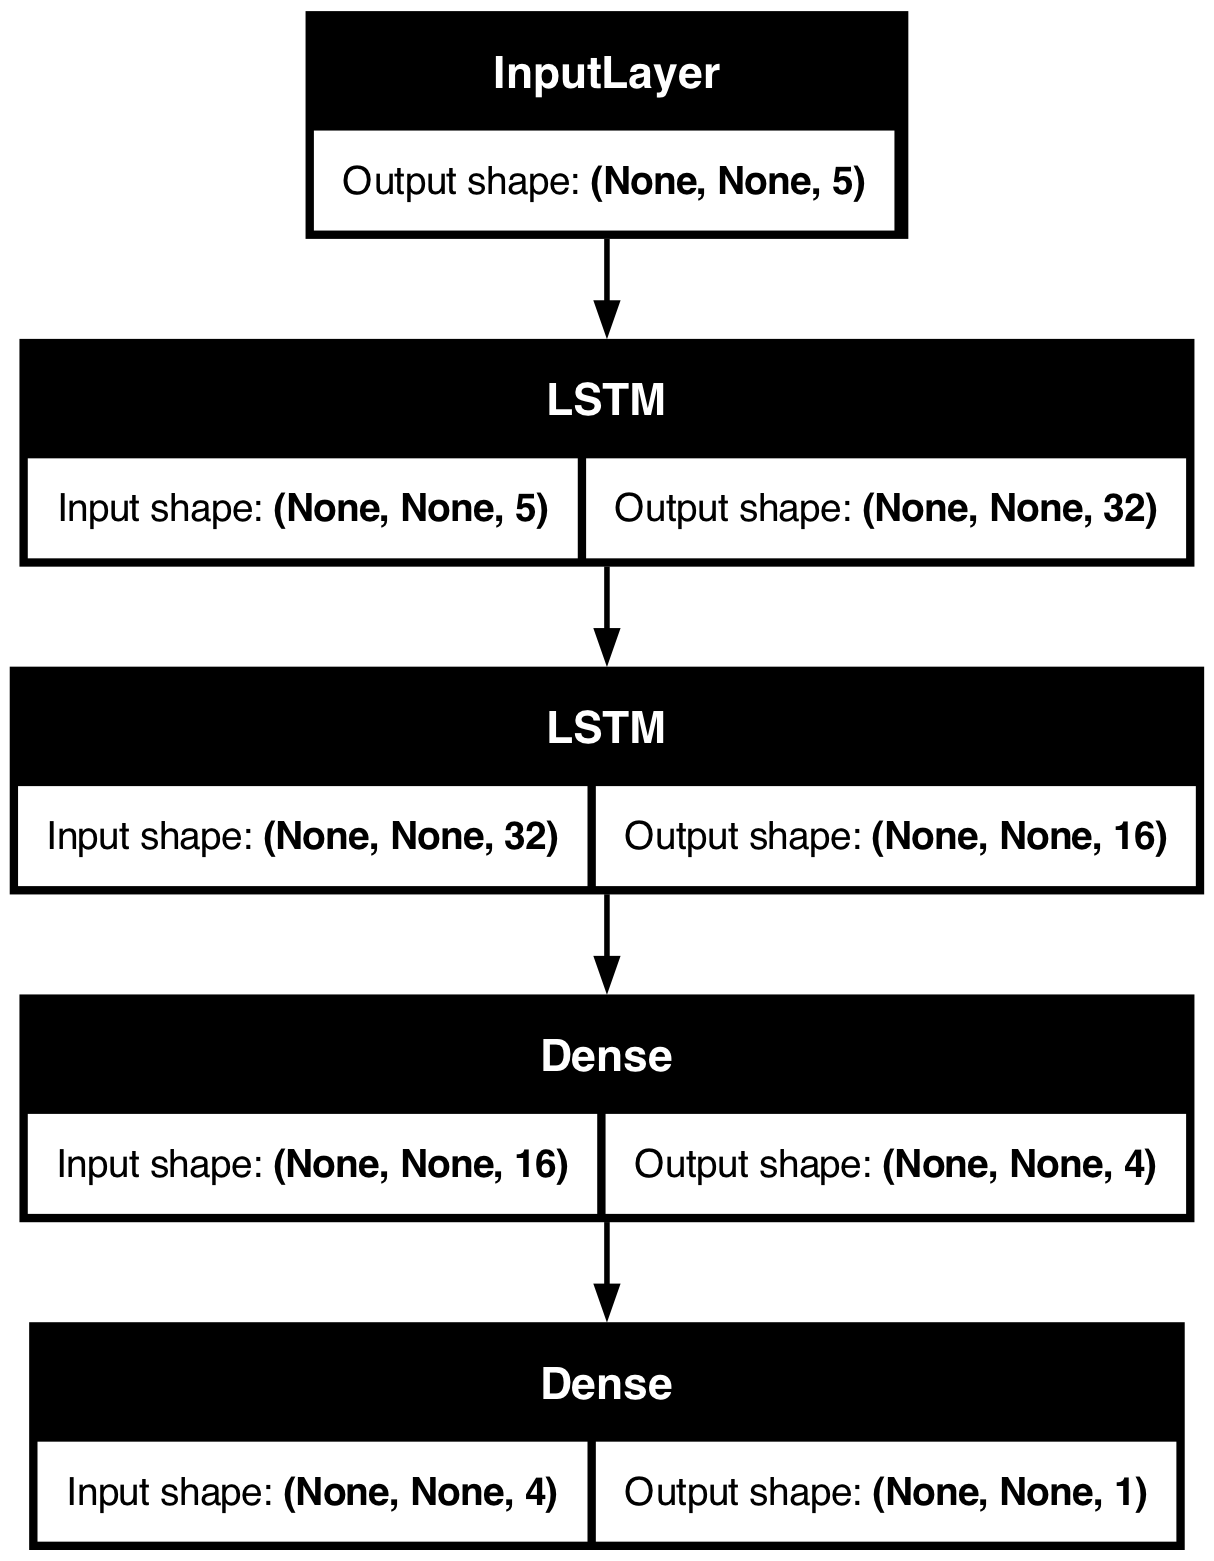

In [100]:
tf.keras.utils.plot_model(model2,show_shapes=True)

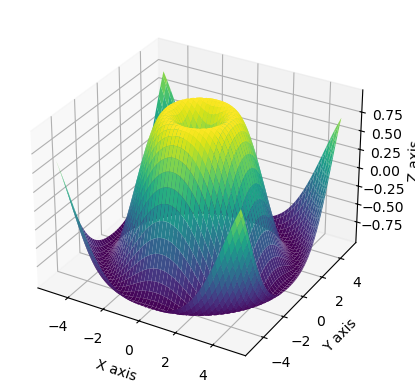

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# สร้างข้อมูลสำหรับแกน X, Y และ Z
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2))

# สร้างกราฟ 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# วาดพื้นผิว (surface plot)
ax.plot_surface(x, y, z, cmap='viridis')

# เพิ่มชื่อแกน
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()


In [102]:
import plotly.graph_objs as go
import numpy as np

# สร้างข้อมูลสำหรับแกน X, Y และ Z
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2))

# สร้างพื้นผิว (surface)
surface = go.Surface(x=x, y=y, z=z)

# กำหนด layout ของกราฟ
layout = go.Layout(scene=dict(
                    xaxis_title='X Axis',
                    yaxis_title='Y Axis',
                    zaxis_title='Z Axis'))

# สร้างกราฟ
fig = go.Figure(data=[surface], layout=layout)

# แสดงผล
fig.show()


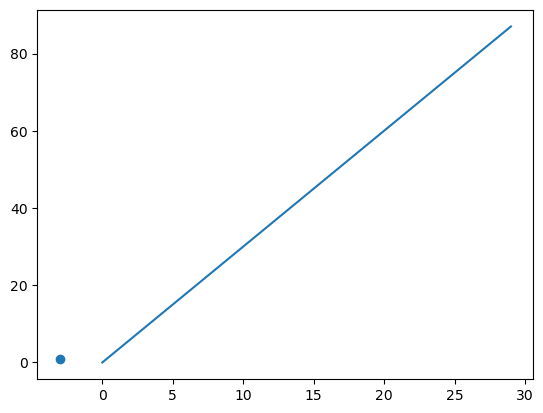

In [111]:
x=np.array(range(30))
y=3*x
plt.plot(x,y)
plt.scatter(-3,1)

In [112]:
def coinchange3(total): #coinchange แบบมีจำนวนแบงก์จำกัด
  banknotes = [1000, 500, 100, 50, 20, 10, 5, 2, 1]
  supply = {1000:1,500:2,100:3,50:4,20:5,10:6,5:7,2:8,1:9}
  changes = {}
  for b in banknotes:
    changes[b] = int(total/b)
    if changes[b] > supply[b]:
       changes[b] = supply[b]
    total = total - b*changes[b]
  if total > 0:
    changes[1000] = -1111
  return (changes)

In [128]:
coinchange3(300)

In [139]:
def coinchange3(total): #coinchange แบบมีจำนวนแบงก์จำกัด
  banknotes = [1000, 500, 100, 50, 20, 10, 5, 2, 1]
  supply = {1000:1,500:2,100:3,50:4,20:5,10:6,5:7,2:8,1:9}
  changes = {}
  if total>2720:
    raise("Can't changed")
  for b in banknotes:
    changes[b] = int(total/b)
    if changes[b] > supply[b]:
       changes[b] = supply[b]
    total = total - b*changes[b]
  return (changes)  
      
      
  

In [140]:
coinchange3(1200)

{1000: 1, 500: 0, 100: 2, 50: 0, 20: 0, 10: 0, 5: 0, 2: 0, 1: 0}

In [159]:

def diff(x1,x2):
    a1,a2=x1.split(".")
    x1_min=int(a1)*60+int(a2)
    b1,b2=x2.split(".")
    x2_min=int(b1)*60+int(b2)
    diff=x2_min-x1_min
    diff_h=int(diff/60)
    diff_m=diff%60
    print​(f"hour:{diff_h} min:{diff_m}")
diff(x1=input("enter 2 digit"),x2=input("enter 2 digit"))

hour:0 min:30


In [150]:
5%4

1

In [145]:
a2

'30'

In [ ]:
print()

In [161]:
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow.keras import layers

# ตั้งค่าไลบรารี TensorFlow Probability
tfd = tfp.distributions
tfpl = tfp.layers

# กำหนดขนาดข้อมูลเข้า (input shape) และจำนวน output
input_shape = (10,)  # ข้อมูลเข้า (input) มี 10 features
n_outputs = 1  # ข้อมูลออก (output) 1 ค่า

# สร้าง Bayesian Neural Network
def build_bayesian_model(input_shape, n_outputs):
    model = tf.keras.Sequential([
        layers.InputLayer(input_shape=input_shape),

        # Bayesian layer ที่ใช้เพื่อสร้าง Dense Variational layer
        tfpl.DenseVariational(
            units=64,  # จำนวนหน่วยของเลเยอร์
            make_posterior_fn=tfpl.default_mean_field_normal_fn(),
            make_prior_fn=tfpl.default_mean_field_normal_fn(),
            kl_weight=1/n_outputs,
            activation='relu'
        ),
        
        # เพิ่ม Bayesian layer ที่สอง
        tfpl.DenseVariational(
            units=64,
            make_posterior_fn=tfpl.default_mean_field_normal_fn(),
            make_prior_fn=tfpl.default_mean_field_normal_fn(),
            kl_weight=1/n_outputs,
            activation='relu'
        ),
        
        # Output layer ที่เป็นค่าความน่าจะเป็น
        tfpl.DenseVariational(
            units=n_outputs,
            make_posterior_fn=tfpl.default_mean_field_normal_fn(),
            make_prior_fn=tfpl.default_mean_field_normal_fn(),
            kl_weight=1/n_outputs,
            activation='sigmoid'  # ใช้ sigmoid ในกรณีของ binary classification
        )
    ])
    
    return model

# สร้างโมเดล Bayesian
model = build_bayesian_model(input_shape, n_outputs)

# คอมไพล์โมเดลโดยใช้ loss แบบ binary crossentropy และ optimizer Adam
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# สรุปโมเดล
model.summary()

# การเทรนโมเดล (ตัวอย่างข้อมูลจำลอง)
import numpy as np
X_train = np.random.randn(100, 10)  # ตัวอย่างข้อมูลขนาด 100 แถว และ 10 ฟีเจอร์
y_train = np.random.randint(0, 2, size=100)  # ตัวอย่างป้ายกำกับ (label) เป็น 0 หรือ 1

# เทรนโมเดล
model.fit(X_train, y_train, epochs=20, batch_size=32)


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning:

Argument `input_shape` is deprecated. Use `shape` instead.



ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_probability.python.layers.dense_variational_v2.DenseVariational object at 0x17875f650> (of type <class 'tensorflow_probability.python.layers.dense_variational_v2.DenseVariational'>)

In [1]:
import numpy as np

In [2]:
x=np.random.standard_normal((2,10,3))

In [3]:
for i in x:
    print(i)

[[ 2.31148478  0.16287162 -1.80286664]
 [ 1.05609321  0.37822161 -0.28340665]
 [-0.39836284 -0.5832166   0.46121518]
 [-0.36961421  0.43384219  0.38477619]
 [ 1.83901492 -0.29783421  1.50209641]
 [ 0.90748032 -1.17253578  1.94450365]
 [-0.36587619 -1.89104252 -0.50524629]
 [ 0.30696069 -0.83516438 -1.88530503]
 [ 1.35299703  1.52293732  0.3277701 ]
 [ 0.57641094  0.01989108 -0.31279245]]
[[ 1.55086724e+00 -1.21125251e+00 -1.04557322e+00]
 [-7.48918855e-01 -2.31483646e-01 -6.15389345e-01]
 [-3.60633630e-01  1.30165237e+00 -4.51330567e-01]
 [ 1.66384569e+00  6.09217538e-01 -9.00237963e-01]
 [ 4.54349293e-01  8.04357072e-01 -6.11105898e-01]
 [-2.14321380e+00  1.25614775e-03  5.82995983e-01]
 [ 2.27212067e-02 -5.39591355e-01 -5.32755564e-01]
 [ 6.60765250e-01  7.41132935e-01 -2.41544968e+00]
 [ 1.87408558e-01 -5.71070534e-01  9.73299794e-01]
 [ 3.11894194e-01  7.69560430e-01 -2.66341929e-01]]


In [4]:
x


array([[[ 2.31148478e+00,  1.62871615e-01, -1.80286664e+00],
        [ 1.05609321e+00,  3.78221608e-01, -2.83406654e-01],
        [-3.98362843e-01, -5.83216600e-01,  4.61215181e-01],
        [-3.69614213e-01,  4.33842186e-01,  3.84776195e-01],
        [ 1.83901492e+00, -2.97834209e-01,  1.50209641e+00],
        [ 9.07480320e-01, -1.17253578e+00,  1.94450365e+00],
        [-3.65876193e-01, -1.89104252e+00, -5.05246293e-01],
        [ 3.06960693e-01, -8.35164381e-01, -1.88530503e+00],
        [ 1.35299703e+00,  1.52293732e+00,  3.27770102e-01],
        [ 5.76410944e-01,  1.98910769e-02, -3.12792447e-01]],

       [[ 1.55086724e+00, -1.21125251e+00, -1.04557322e+00],
        [-7.48918855e-01, -2.31483646e-01, -6.15389345e-01],
        [-3.60633630e-01,  1.30165237e+00, -4.51330567e-01],
        [ 1.66384569e+00,  6.09217538e-01, -9.00237963e-01],
        [ 4.54349293e-01,  8.04357072e-01, -6.11105898e-01],
        [-2.14321380e+00,  1.25614775e-03,  5.82995983e-01],
        [ 2.27212067e-

In [6]:
c=[(10,2)]

In [8]:
c.pop()

(10, 2)

In [10]:
def f(x):
    return x**3

In [11]:
f(3).grad()

AttributeError: 'int' object has no attribute 'grad'

In [15]:
class ADVariable:
    def __init__(self, value, grad=0.0):
        self.value = value
        self.grad = grad
        self.parents = []

    def add_parent(self, parent, grad_fn):
        self.parents.append((parent, grad_fn))

    def backward(self):
        stack = [(self, 1.0)]
        
        while stack:
            var, path_grad = stack.pop()
            var.grad += path_grad
            
            for parent, grad_fn in var.parents:
                stack.append((parent, path_grad * grad_fn(var.value)))

    def __add__(self, other):
        if not isinstance(other, ADVariable):
            other = ADVariable(other)
        result = ADVariable(self.value + other.value)
        result.add_parent(self, lambda _: 1)
        result.add_parent(other, lambda _: 1)
        return result

    def __mul__(self, other):
        if not isinstance(other, ADVariable):
            other = ADVariable(other)
        result = ADVariable(self.value * other.value)
        result.add_parent(self, lambda _: other.value)
        result.add_parent(other, lambda _: self.value)
        return result

def my_function(x, y):
    return (x * x) + (y * y) + (2 * x * y)

x = ADVariable(3.0)
y = ADVariable(4.0)

z = my_function(x, y)
z.backward()

print("Value of function f:", z.value)
print("Gradient with respect to x:", x.grad)
print("Gradient with respect to y:", y.grad)


TypeError: unsupported operand type(s) for *: 'int' and 'ADVariable'

In [56]:
class A:
    def __init__(self):
        print("Initializing A")
class e:
    def __init__(self):
        print("Initializing e")
class B(A):
    def __init__(self,a,c):
        super().__init__()  # ใช้ super() แบบดั้งเดิม
        print("Initializing B")
        print(a)

class C(A):
    def __init__(self):
        super().__init__()  # ใช้ super() แบบดั้งเดิม
        print("Initializing C")

class D(B):  # D สืบทอดจาก B และ C
    def __init__(self):
        super(D).__init__()  # ใช้ super() แบบดั้งเดิม
        print("Initializing D")

# สร้างออบเจ็กต์จาก D
obj = D()


Initializing D


In [23]:
class D(B, C):  # D inherits from B and C
    def __init__(self):
        super(B, self).__init__()  # ใช้ super() แบบระบุคลาส
        print("Initializing D")

# สร้างออบเจ็กต์จาก D
obj = D()


Initializing A
Initializing C
Initializing D


In [73]:
import tensorflow as tf

class MyModel(tf.keras.Model):
    def __init__(self, input_shape, num_classes):
        super(MyModel, self).__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(128, activation='relu')
        self.dropout = tf.keras.layers.Dropout(0.5)  # Dropout ที่มีอัตรา 50%
        self.dense2 = tf.keras.layers.Dense(num_classes, activation='softmax')

    def __call__(self, inputs, training=False):
        x = self.flatten(inputs)
        x = self.dense1(x)
        x = self.dropout(x, training=training)  # เปิดใช้ Dropout ตามค่า training
        return self.dense2(x)

In [74]:
import numpy as np
np.random.seed(6)
sample_input = np.random.rand(1, 28, 28).astype(np.float32)

In [75]:
input_shape = (28, 28)
num_classes = 10
model = MyModel(input_shape, num_classes)

In [78]:


 # อินพุตขนาด (1, 28, 28)

# ใช้ Monte Carlo Dropout โดยกำหนด training=True ในช่วงทำนาย
predictions = [model(sample_input) for _ in range(10)]
average_prediction = tf.reduce_mean(predictions, axis=0)

print("Average prediction with Dropout active during inference:", average_prediction)


Average prediction with Dropout active during inference: tf.Tensor(
[[0.13601768 0.10779606 0.01097545 0.05880535 0.23850337 0.08137841
  0.1511481  0.14260724 0.03801599 0.03475237]], shape=(1, 10), dtype=float32)


In [79]:
import tensorflow as tf

In [111]:
model=tf.keras.Sequential([
    tf.keras.layers.GRU(20,input_shape=(10,20),return_sequences=True)
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [119]:
x=np.random.standard_normal((50,10,20))
x2=np.random.standard_normal((50,5,20))
y=np.random.standard_normal((50,10,20))
y2=np.random.standard_normal((50,5,20))

In [132]:
xx=np.array([x,x2])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 50) + inhomogeneous part.

In [131]:
xx.shape

AttributeError: 'list' object has no attribute 'shape'

In [113]:
model.compile(loss="mse",optimizer="adam")

In [114]:
model.fit(x,y,epochs=5)

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0738  
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0667 
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0638 
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0661 
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0612 


In [117]:
x1=np.random.standard_normal((1,50,20))

In [124]:
k=model(x1)

In [125]:
k2=model(x1[:,:25,:])

In [127]:
np.sum(k[:,:25,:]!=k2)

0

In [138]:
x=np.random.standard_normal((4,3))

In [139]:
x

array([[-0.32362041, -0.32363718, -0.01663   ],
       [-0.39473566,  0.34822154, -0.34622136],
       [ 0.59636626,  0.11229095, -0.41146958],
       [ 0.89063451,  0.09781462, -0.0256342 ]])

In [140]:
np.diag(x)

array([-0.32362041,  0.34822154, -0.41146958])